In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
import sklearn.linear_model as LinearRegression

In [3]:
df = pd.read_csv('AirBNB.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12184\436833659.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AirBNB.csv')


In [9]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [13]:
df['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [15]:
df.drop('id',axis=1,inplace = True)

In [21]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [23]:
num=[]
cat=[]
for i in df.columns:
    if df[i].dtype != 'object':
        num.append(i)
    else:
        cat.append(i)

In [25]:
num

['accommodates',
 'bathrooms',
 'review_scores_rating',
 'bedrooms',
 'beds',
 'log_price']

In [27]:
cat

['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable']

In [35]:
Data_Summary = round(df[num].describe().T,2)

In [43]:
Data_Summary['CoV'] = round(Data_Summary['std'] * 100/Data_Summary['mean'],2)

In [45]:
Data_Summary['Med-to-meam'] = round(Data_Summary['50%']/Data_Summary['mean'],2)

In [47]:
Data_Summary

,count,mean,std,min,25%,50%,75%,max,CoV,Med-to-meam
accommodates,74108.0,3.16,2.15,1.0,2.00,2.00,4.00,16.0,68.04,0.63
bathrooms,73908.0,1.24,0.58,0.0,1.00,1.00,1.00,8.0,46.77,0.81
review_scores_rating,57389.0,94.07,7.84,20.0,92.00,96.00,100.00,100.0,8.33,1.02
bedrooms,74019.0,1.27,0.85,0.0,1.00,1.00,1.00,10.0,66.93,0.79
beds,73980.0,1.71,1.25,0.0,1.00,1.00,2.00,18.0,73.10,0.58
log_price,74111.0,4.78,0.72,0.0,4.32,4.71,5.22,7.6,15.06,0.99


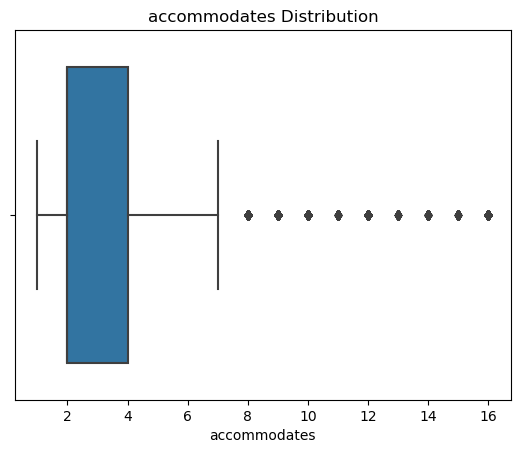

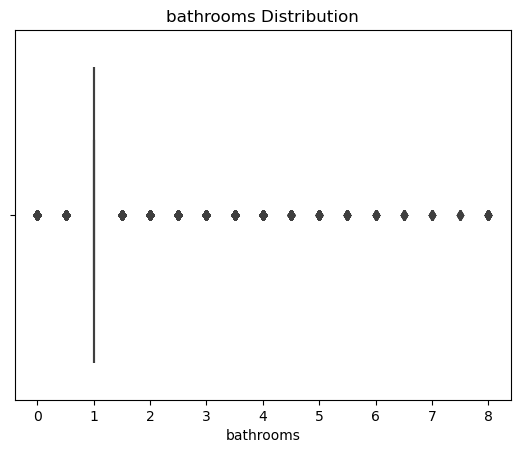

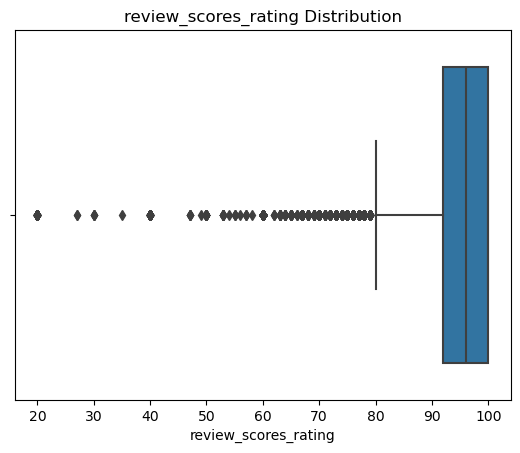

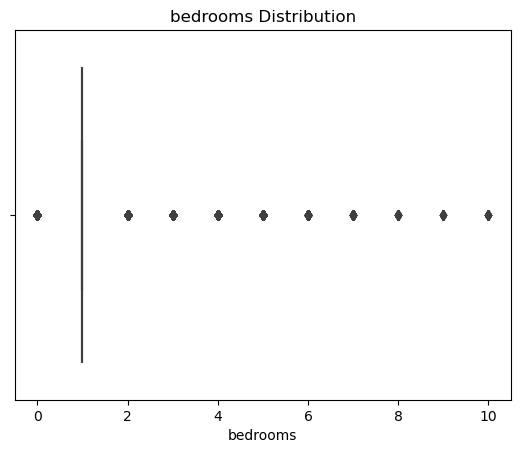

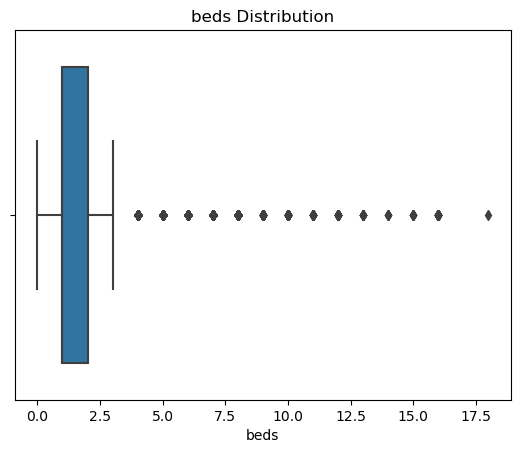

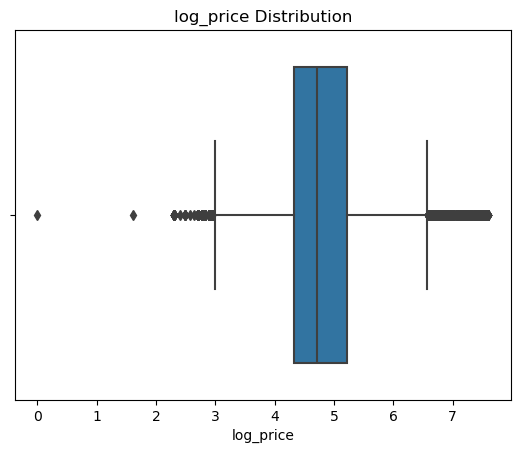

In [51]:
for i in num:
    ax = sns.boxplot(data = df[num],x = i)
    ax.set(title='{} Distribution'.format(i), xlabel='{}'.format(i))
    plt.show()

In [61]:
for i in cat:
    print(df[i].value_counts(normalize = True))
    print()

room_type
Entire home/apt    0.557418
Private room       0.413394
Shared room        0.029188
Name: proportion, dtype: float64

cancellation_policy
strict      0.438579
flexible    0.304212
moderate    0.257210
Name: proportion, dtype: float64

cleaning_fee
True     0.73406
False    0.26594
Name: proportion, dtype: float64

instant_bookable
f    0.737542
t    0.262458
Name: proportion, dtype: float64



In [81]:
sns.pairplot(df[num],hue = 'log_price')

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Error in callback <function flush_figures at 0x000002A0EEDDA700> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

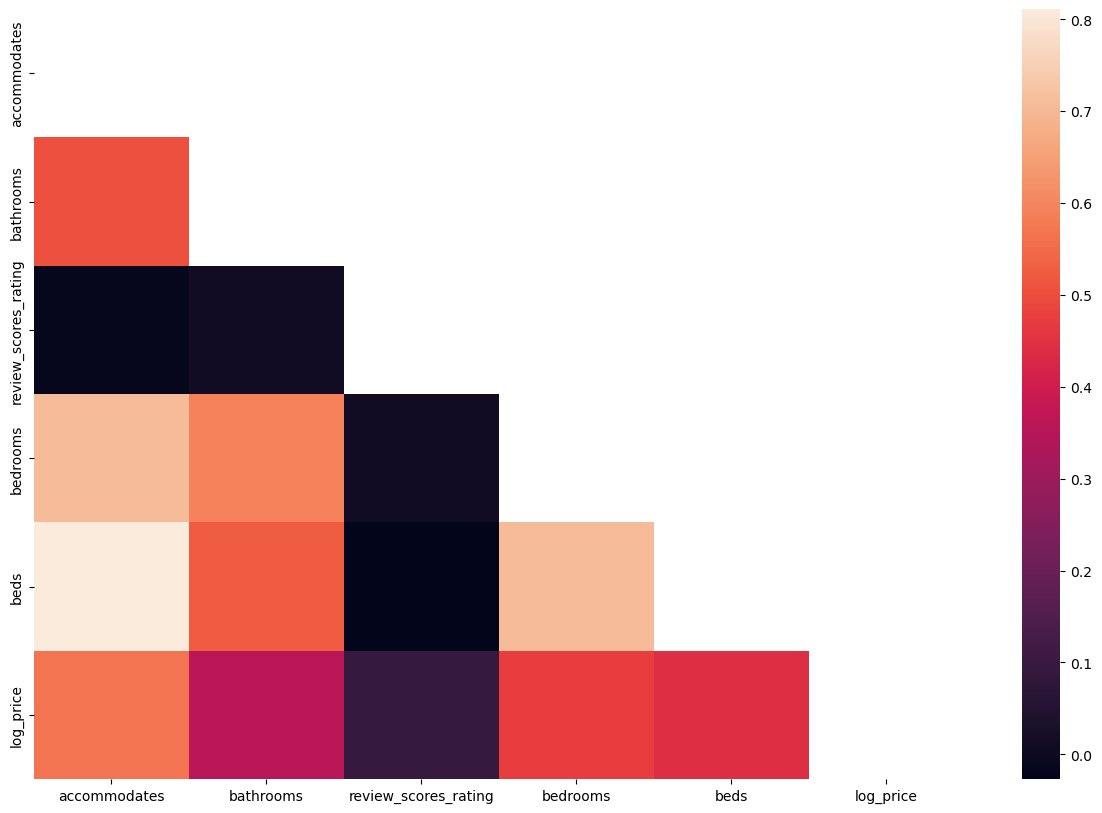

In [69]:
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(df[num].corr(), dtype=bool))
sns.heatmap(round(df[num].corr(),3),annot = True,mask = mask)

In [79]:
df[num].corr()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
accommodates,1.000000,0.505645,-0.017093,0.709275,0.810798,0.567580
bathrooms,0.505645,1.000000,0.010527,0.589935,0.525598,0.355425
review_scores_rating,-0.017093,0.010527,1.000000,0.011134,-0.027330,0.091219
bedrooms,0.709275,0.589935,0.011134,1.000000,0.709415,0.473214
beds,0.810798,0.525598,-0.027330,0.709415,1.000000,0.442153
log_price,0.567580,0.355425,0.091219,0.473214,0.442153,1.000000


In [95]:
df['cleaning_fee'].replace(to_replace ='False',value = 0, inplace = True)

In [117]:
df['cleaning_fee'] = df['cleaning_fee'].astype(str)
df['cleaning_fee'].replace(to_replace=['False', 'True'], value=[1, 1], inplace=True)

In [119]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,f,1,0,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,t,1,1,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,t,1,1,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,f,1,0,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,t,1,1,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,f,0,0,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,f,1,0,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,t,1,1,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,t,1,1,NaN,0.0,2.0,5.273000


In [121]:
df['instant_bookable'] = df['instant_bookable'].astype(str)
df['instant_bookable'].replace(to_replace=['f', 't'], value=[1, 2], inplace=True)

In [129]:
df['cancellation_policy'] = df['cancellation_policy'].astype(str)
df['cancellation_policy'].replace(to_replace=['strict', 'moderate','flexible'], value=[1, 2, 3], inplace=True)

In [131]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,1,3.0,1.0,0,1,0,100.0,1.0,1.0,5.010635
1,1,7.0,1.0,1,1,1,93.0,3.0,3.0,5.129899
2,1,5.0,1.0,1,1,1,92.0,1.0,3.0,4.976734
3,1,4.0,1.0,0,1,0,NaN,2.0,2.0,6.620073
4,1,2.0,1.0,1,1,1,40.0,0.0,1.0,4.744932


In [127]:
df['room_type'] = df['room_type'].astype(str)
df['room_type'].replace(to_replace=['Entire home/apt', 'Private room','Shared room'], value=[1, 2, 3], inplace=True)

In [133]:
df[cat]

,room_type,cancellation_policy,cleaning_fee,instant_bookable
0,1,0,1,0
1,1,1,1,1
2,1,1,1,1
3,1,0,1,0
4,1,1,1,1
...,...,...,...,...
74106,2,0,0,0
74107,1,0,1,0
74108,1,1,1,1
74109,1,1,1,1


### Null Values Treatment

##### Knn Imputer

In [142]:
df.isnull().sum()

room_type                   0
accommodates                3
bathrooms                 203
cancellation_policy         0
cleaning_fee                0
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [140]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors = 5)
df = imputer.fit_transform(df)